In [ ]:
#libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import requests
import json
import os
!pip install sodapy
from sodapy import Socrata


In [ ]:
#API to grab infromation about HATE CRIMES
token="MrRhorhd6eMTNgr9HvFWT1EJa"
dataset_identifier="bqiq-cu78"
client = Socrata("data.cityofnewyork.us", token)

metadata=client.get_metadata(dataset_identifier)
[x["name"] for x in metadata["columns"]]

# QUERY to grab information
query = """
select full_complaint_id,
complaint_year_number,
month_number,
record_create_date,
complaint_precinct_code,
patrol_borough_name,
law_code_category_description,
county,
offense_description,
pd_code_description,
bias_motive_description,
offense_category,
arrest_date,
arrest_id
"""


Hate_Crime = client.get(dataset_identifier,query=query)


Hate_Crime_df = pd.DataFrame.from_records(Hate_Crime)



In [ ]:
# Cleaning the data for easier graphs
Hate_Crime_df["county"]=Hate_Crime_df["county"].replace("KINGS","BROOKLYN").replace('RICHMOND','STATEN ISLAND').replace('NEW YORK','MANHATTAN')
Hate_Crime_df['offense_category']=Hate_Crime_df['offense_category'].replace('Race/Color','Race').replace('Religion/Religious Practice','Religion').replace("Ethnicity/National Origin/Ancestry","Ethnicity")
Hate_Crime_df

,full_complaint_id,complaint_year_number,month_number,record_create_date,complaint_precinct_code,patrol_borough_name,law_code_category_description,county,offense_description,pd_code_description,bias_motive_description,offense_category,arrest_date,arrest_id
0,201904612204817,2019,2,2019-02-08T00:00:00.000,46,PATROL BORO BRONX,FELONY,BRONX,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,2019-02-08T00:00:00.000,B31678218
1,201904812229517,2019,3,2019-03-09T00:00:00.000,48,PATROL BORO BRONX,MISDEMEANOR,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race,2019-03-09T00:00:00.000,B31682790
2,201904812226617,2019,3,2019-03-08T00:00:00.000,48,PATROL BORO BRONX,MISDEMEANOR,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race,2019-03-09T00:00:00.000,B31682806
3,201904812231317,2019,3,2019-03-10T00:00:00.000,48,PATROL BORO BRONX,MISDEMEANOR,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race,2019-03-09T00:00:00.000,B31682806
4,201904212405517,2019,5,2019-05-11T00:00:00.000,42,PATROL BORO BRONX,FELONY,BRONX,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion,2019-05-10T00:00:00.000,B31692174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,202101312879217,2021,12,2021-12-11T00:00:00.000,13,PATROL BORO MAN SOUTH,FELONY,MANHATTAN,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion,NaN,NaN
996,202101412247917,2021,3,2021-03-08T00:00:00.000,14,PATROL BORO MAN SOUTH,MISDEMEANOR,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-ASIAN,Race,NaN,NaN
997,202101412305517,2021,3,2021-03-25T00:00:00.000,14,PATROL BORO MAN SOUTH,MISDEMEANOR,MANHATTAN,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-ASIAN,Race,NaN,NaN
998,202101412319817,2021,3,2021-03-30T00:00:00.000,14,PATROL BORO MAN SOUTH,FELONY,MANHATTAN,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1,ANTI-ASIAN,Race,NaN,NaN


In [ ]:
Hate_Crime_df["bias_motive_description"].unique()
Hate_Crime_df["bias_motive_description"]=Hate_Crime_df["bias_motive_description"].replace('ANTI-MALE HOMOSEXUAL (GAY)','GAY').replace('ANTI-WHITE','WHITE').replace('ANTI-HISPANIC','HISPANIC').replace('ANTI-JEWISH','JEWISH').replace('ANTI-ASIAN','ASIAN').replace('ANTI-BLACK','BLACK').replace('ANTI-FEMALE HOMOSEXUAL (LESBIAN)','LESBIAN').replace('ANTI-ARAB','ARAB').replace('ANTI-GENDER NON-CONFORMING','GENDER NON-CONFORMING').replace('ANTI-FEMALE','FEMALE').replace('ANTI-LGBT (MIXED GROUP)','LGBT').replace('ANTI-MULTI-RACIAL GROUPS','MULTI RACIAL').replace('ANTI-OTHER ETHNICITY','OTHER').replace('ANTI-HINDU','HINDU').replace('ANTI-BUDDHIST','BUDDHIST').replace('ANTI-JEHOVAHS WITNESS','JEHOVAHS WITNESS').replace('ANTI-PHYSICAL DISABILITY','PHYSICAL DISABILITY').replace('ANTI-OTHER RELIGION','OTHER RELIGION').replace('ANTI-RELIGIOUS PRACTICE GENERALLY','RELIGION')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


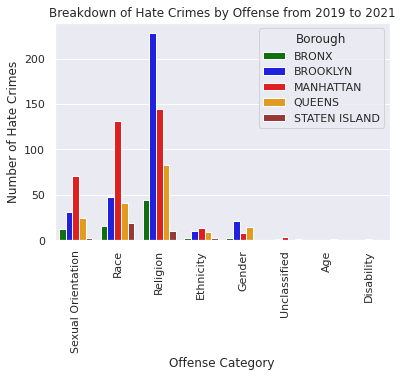

In [ ]:
# Ericson's GRAPH 1
W=sns.set_style("darkgrid")
W=sns.set_context("notebook")
palette_colors={"BRONX":"green","MANHATTAN":"red","BROOKLYN":"blue","QUEENS":"orange","STATEN ISLAND":"brown"}
W=sns.countplot(Hate_Crime_df["offense_category"],hue=Hate_Crime_df["county"],palette=palette_colors)
plt.xticks(rotation=90)
plt.legend(title='Borough',loc='upper right')
W.set_title('Breakdown of Hate Crimes by Offense from 2019 to 2021')
W.set_xlabel("Offense Category")
W.set_ylabel("Number of Hate Crimes")

plt.savefig('EricsonGraph1.png',bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


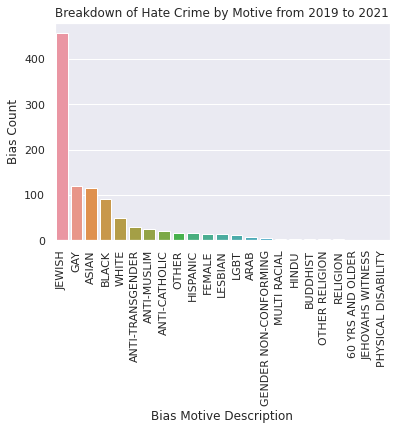

In [ ]:
# Ericson's GRAPH 2
S=sns.countplot(Hate_Crime_df["bias_motive_description"],order=Hate_Crime_df["bias_motive_description"].value_counts().index)
S.set_title('Breakdown of Hate Crime by Motive from 2019 to 2021')
S.set_xlabel("Bias Motive Description")
S.set_ylabel("Bias Count")
plt.xticks(rotation=90)

plt.savefig('EricsonGraph2.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


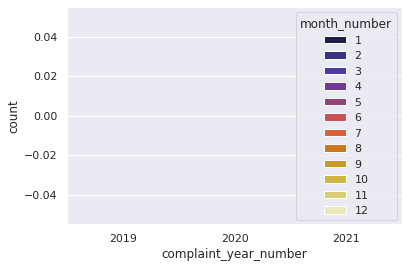

In [ ]:
# Ericson GRAPH 3
D=sns.countplot(Hate_Crime_df["complaint_year_number"],
                hue=Hate_Crime_df["month_number"],
                order=Hate_Crime_df["complaint_year_number"].unique(),
                hue_order=[1,2,3,4,5,6,7,8,9,10,11,12],
                palette='CMRmap')


In [ ]:
token="slJTBjNWDQSDAXdxtfz16w5iU"
dataset_identifier="rc75-m7u3"
client = Socrata("data.cityofnewyork.us", token)

metadata=client.get_metadata(dataset_identifier)
[x["name"] for x in metadata["columns"]]

query = """
select date_of_interest,
case_count,
probable_case_count,
death_count,
hospitalized_count,
bx_case_count,
bx_death_count,
bx_hospitalized_count,
bk_case_count,
bk_death_count,
bk_hospitalized_count,
mn_case_count,
mn_death_count,
mn_hospitalized_count,
qn_case_count,
qn_death_count,
qn_hospitalized_count,
si_case_count,
si_death_count,
si_hospitalized_count
"""

Covid_19 = client.get(dataset_identifier,query=query)

Covid_19_df = pd.DataFrame.from_records(Covid_19)

In [ ]:
Covid_19_dates=[]
for stuff in Covid_19_df["date_of_interest"]:
  stuff=stuff.replace('T00:00:00.000','')
  Covid_19_dates.append(stuff)

Covid_19_df["date_of_interest"]=Covid_19_dates

Covid_19_df

,date_of_interest,case_count,probable_case_count,death_count,hospitalized_count,bx_case_count,bx_death_count,bx_hospitalized_count,bk_case_count,bk_death_count,bk_hospitalized_count,mn_case_count,mn_death_count,mn_hospitalized_count,qn_case_count,qn_death_count,qn_hospitalized_count,si_case_count,si_death_count,si_hospitalized_count
0,2020-02-29,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,0,7,0,0,1,0,0,3,0,0,1,1,0,2,0,0,0
4,2020-03-04,5,0,0,2,0,0,0,1,0,1,2,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,2022-04-01,1288,265,5,28,112,1,4,387,1,6,452,1,12,271,2,5,66,0,2
763,2022-04-02,789,211,2,25,64,0,6,266,0,6,270,0,5,156,1,7,33,1,1
764,2022-04-03,740,260,4,25,51,2,7,257,0,6,244,1,6,146,0,3,41,1,3
765,2022-04-04,1856,394,2,12,167,1,1,542,0,4,692,1,4,374,0,3,81,0,0


In [ ]:

Covid_19_df['date_of_interest']=Covid_19_df['date_of_interest'].apply(pd.to_datetime)
Covid_19_df[Covid_19_df.columns.difference(['date_of_interest'])]=Covid_19_df[Covid_19_df.columns.difference(['date_of_interest'])].apply(pd.to_numeric)
Covid_19_df

,date_of_interest,case_count,probable_case_count,death_count,hospitalized_count,bx_case_count,bx_death_count,bx_hospitalized_count,bk_case_count,bk_death_count,bk_hospitalized_count,mn_case_count,mn_death_count,mn_hospitalized_count,qn_case_count,qn_death_count,qn_hospitalized_count,si_case_count,si_death_count,si_hospitalized_count
0,2020-02-29,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,0,7,0,0,1,0,0,3,0,0,1,1,0,2,0,0,0
4,2020-03-04,5,0,0,2,0,0,0,1,0,1,2,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,2022-04-01,1288,265,5,28,112,1,4,387,1,6,452,1,12,271,2,5,66,0,2
763,2022-04-02,789,211,2,25,64,0,6,266,0,6,270,0,5,156,1,7,33,1,1
764,2022-04-03,740,260,4,25,51,2,7,257,0,6,244,1,6,146,0,3,41,1,3
765,2022-04-04,1856,394,2,12,167,1,1,542,0,4,692,1,4,374,0,3,81,0,0


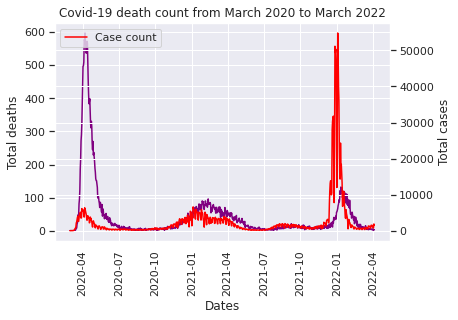

<Figure size 432x288 with 0 Axes>

In [ ]:

%matplotlib inline
fig,ax=plt.subplots()
plt.xticks(rotation=90)
ax2=ax.twinx()
ax2.plot(Covid_19_df['date_of_interest'],Covid_19_df['case_count'], color="red", label="Case count")
ax.plot(Covid_19_df['date_of_interest'],Covid_19_df['death_count'], color="purple", label="death count")
plt.legend(loc='upper left')
ax.set_title('Covid-19 death count from March 2020 to March 2022')
ax.set_xlabel("Dates")
ax2.set_ylabel("Total cases")
ax.set_ylabel("Total deaths")
plt.show()

plt.savefig('MDGraph1.png')

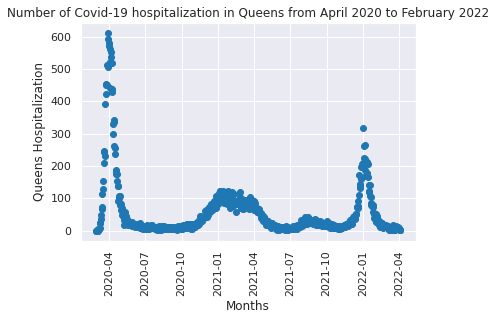

<Figure size 432x288 with 0 Axes>

In [ ]:

x = Covid_19_df['date_of_interest']
y = Covid_19_df['qn_hospitalized_count']
plt.xticks(rotation=90)
plt.scatter(x,y)
plt.title('Number of Covid-19 hospitalization in Queens from April 2020 to February 2022')
plt.xlabel('Months')
plt.ylabel('Queens Hospitalization')
plt.show()
plt.savefig('MDGraph2.png')

In [ ]:
Hate_Crime_df.head()

,full_complaint_id,complaint_year_number,month_number,record_create_date,complaint_precinct_code,patrol_borough_name,law_code_category_description,county,offense_description,pd_code_description,bias_motive_description,offense_category,arrest_date,arrest_id
0,201904612204817,2019,2,2019-02-08T00:00:00.000,46,PATROL BORO BRONX,FELONY,BRONX,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",GAY,Sexual Orientation,2019-02-08T00:00:00.000,B31678218
1,201904812229517,2019,3,2019-03-09T00:00:00.000,48,PATROL BORO BRONX,MISDEMEANOR,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,WHITE,Race,2019-03-09T00:00:00.000,B31682790
2,201904812226617,2019,3,2019-03-08T00:00:00.000,48,PATROL BORO BRONX,MISDEMEANOR,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,WHITE,Race,2019-03-09T00:00:00.000,B31682806
3,201904812231317,2019,3,2019-03-10T00:00:00.000,48,PATROL BORO BRONX,MISDEMEANOR,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,WHITE,Race,2019-03-09T00:00:00.000,B31682806
4,201904212405517,2019,5,2019-05-11T00:00:00.000,42,PATROL BORO BRONX,FELONY,BRONX,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion,2019-05-10T00:00:00.000,B31692174


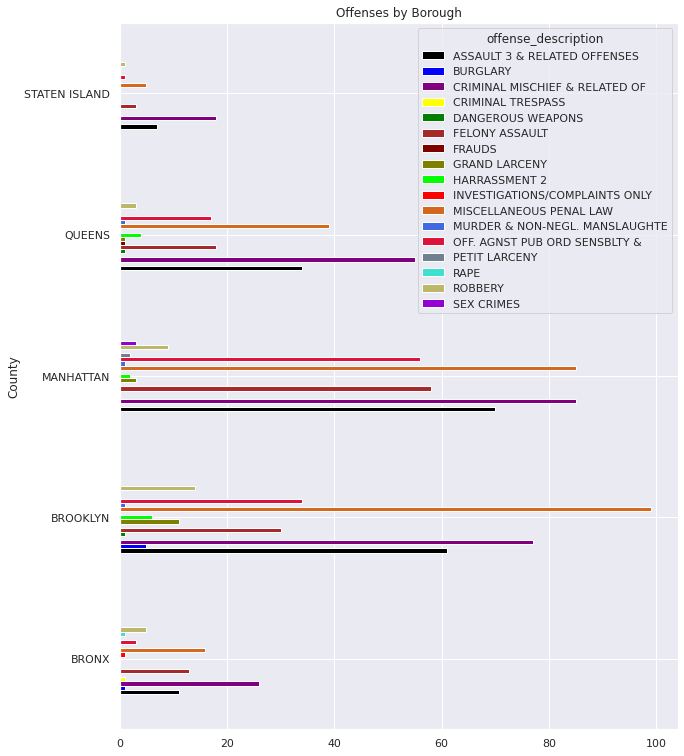

In [ ]:
offense_bo = Hate_Crime_df.sort_values("county").groupby(["county", "offense_description"])["full_complaint_id"].count()
offense_bo.unstack().plot(kind="barh",figsize=(10,13),title = "Offenses by Borough",xlabel = "County", ylabel = "Number of Offenses", 
                          color = ["black", "blue", "purple", "yellow","green","brown","maroon","olive", "lime","red","chocolate","royalblue","crimson","slategray","turquoise","darkkhaki","darkviolet"])
plt.savefig("RuiZhuGraph3.png",format="png", bbox_inches = "tight")


In [ ]:
Hate_Crime_df['complaint_year_number'] = Hate_Crime_df['complaint_year_number'].apply(pd.to_numeric)
Hate_Crime_df['complaint_year_number']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2021
996    2021
997    2021
998    2021
999    2021
Name: complaint_year_number, Length: 1000, dtype: int64

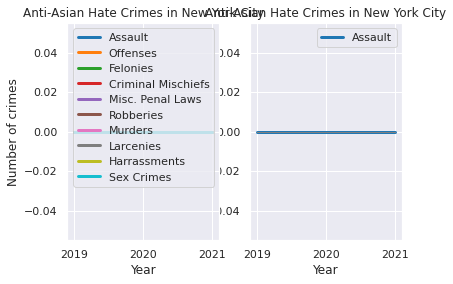

In [ ]:
# Create a dataframe that narrows down Anti-Asian hate crimes
anti_asian = Hate_Crime_df.loc[Hate_Crime_df['bias_motive_description'] == "ANTI-ASIAN"]
# display(anti_asian)

# List to store for plot values, per year - should be 3
all_ass_count = []
all_off_count = []
all_fel_count = []
all_crim_count = []
all_misc_count = []
all_rob_count = []
all_murd_count = []
all_larc_count = []
all_harr_count = []
all_sex_count = []

def create_my_values(crime_lst):
# Counters for each crime type
    ass_count = 0
    off_count = 0
    fel_count = 0
    crim_count = 0
    misc_count = 0
    rob_count = 0
    murd_count = 0
    larc_count = 0
    harr_count = 0
    sex_count = 0    

    for item in crime_lst:
        if item == 'ASSAULT 3 & RELATED OFFENSES':
            ass_count += 1
        if item == 'OFF. AGNST PUB ORD SENSBLTY &':
            off_count += 1
        if item == 'FELONY ASSAULT':
            fel_count += 1
        if item == 'CRIMINAL MISCHIEF & RELATED OF':
            crim_count += 1
        if item == 'MISCELLANEOUS PENAL LAW':
            misc_count += 1
        if item == 'ROBBERY':
            rob_count += 1
        if item == 'MURDER & NON-NEGL. MANSLAUGHTE':
            murd_count += 1
        if item == 'GRAND LARCENY':
            larc_count += 1
        if item == 'HARRASSMENT 2':
            harr_count += 1
        if item == 'SEX CRIMES':
            sex_count += 1

# Append counts to list
    all_ass_count.append(ass_count)
    all_off_count.append(off_count)
    all_fel_count.append(fel_count)
    all_crim_count.append(crim_count)
    all_misc_count.append(misc_count)
    all_rob_count.append(rob_count)
    all_murd_count.append(murd_count)
    all_larc_count.append(larc_count)
    all_harr_count.append(harr_count)
    all_sex_count.append(sex_count)
    
    #return all_murd_count

# Create a dataframe that narrows down per year
anti_asian_2019 = anti_asian.loc[anti_asian['complaint_year_number'] == 2019]
off_2019 = anti_asian_2019['offense_description'].tolist()
create_my_values(off_2019)

anti_asian_2020 = anti_asian.loc[anti_asian['complaint_year_number'] == 2020]
off_2020 = anti_asian_2020['offense_description'].tolist()
create_my_values(off_2020)

anti_asian_2021 = anti_asian.loc[anti_asian['complaint_year_number'] == 2021]
off_2021 = anti_asian_2021['offense_description'].tolist()
create_my_values(off_2021)

Year = ['2019', '2020', '2021']

plt.subplot(1, 2, 2)
plt.plot(Year, all_ass_count, label = "Assault", linewidth = 3.0)
plt.plot(Year, all_off_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_fel_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_crim_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_misc_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_rob_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_murd_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_larc_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_harr_count, linewidth = 1.0, color = 'gray')
plt.plot(Year, all_sex_count, linewidth = 1.0, color = 'gray')
plt.title('Anti-Asian Hate Crimes in New York City')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.legend()

plt.subplot(1, 2, 1)

w = ["Assault","Offenses","Felonies","Criminal Mischiefs","Misc. Penal Laws","Robberies","Murders","Larcenies","Harrassments","Sex Crimes"]
for x in w:
  plt.plot(Year, all_ass_count, label = x, linewidth = 3.0)

plt.title('Anti-Asian Hate Crimes in New York City')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.legend()

plt.savefig('Armand_Graphs.png')

plt.show()